<a href="https://colab.research.google.com/github/AbdelnasserMostafa/-myproject/blob/master/TensorFlow_Master_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/rmlowe/Tensorflow-Bootcamp-master.git

Cloning into 'Tensorflow-Bootcamp-master'...
remote: Enumerating objects: 375, done.
remote: Total 375 (delta 0), reused 0 (delta 0), pack-reused 375
Receiving objects: 100% (375/375), 287.71 MiB | 33.23 MiB/s, done.
Resolving deltas: 100% (192/192), done.
Checking out files: 100% (205/205), done.


In [ ]:
cd /content/Tensorflow-Bootcamp-master/04-Recurrent-Neural-Networks

/content/Tensorflow-Bootcamp-master/04-Recurrent-Neural-Networks


# Convolutional Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [ ]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
mnist.train.num_examples

55000

In [ ]:
mnist.test.num_examples

10000

In [ ]:
mnist.validation.num_examples

5000

## Visualizing the Data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
mnist.train.images[1].shape

(784,)

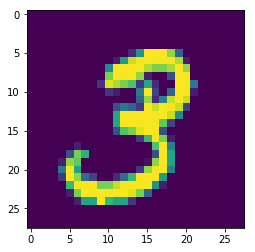

In [ ]:
plt.imshow(mnist.train.images[1].reshape(28, 28))

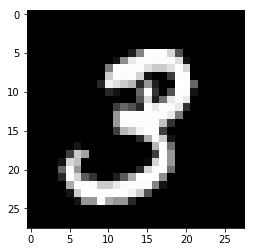

In [ ]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

In [ ]:
mnist.train.images[1].max()

1.0

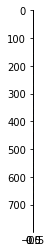

In [ ]:
plt.imshow(mnist.train.images[1].reshape(784,1))

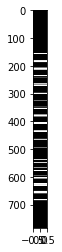

In [ ]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

In [ ]:
# Create the Model
x = tf.placeholder(tf.float32,shape=[None, 784])

# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Create the Graph
y = tf.matmul(x, W) + b

# loss and optimizer
y_true = tf.placeholder(tf.float32, [None, 10])

# Cross Entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

# Create Session
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  # Train the model for 1000 steps on the training set
  # using built in batch feeder from mnist for convenience
  for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
  # Test the Train Model
  matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
  acc = tf.reduce_mean(tf.cast(matches, tf.float32))
  print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

  

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

0.9151


## MNIST with CNN

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
# Helper Functions
def init_weights(shape):
  init_random_dist = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(init_random_dist)

# Same as init_weights, but for the biases
def init_bias(shape):
  init_bias_vals = tf.constant(0.1, shape=shape)
  return tf.Variable(init_bias_vals)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2by2(x):
  return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def convolutional_layer(input_x, shape):
  W = init_weights(shape)
  b = init_bias([shape[3]])
  return tf.nn.relu(conv2d(input_x, W) + b)

# This is a normal fully connected layer
def normal_full_layer(input_layer, size):
  input_size = int(input_layer.get_shape()[1])
  W = init_weights([input_size, size])
  b = init_bias([size])
  return tf.matmul(input_layer, W) + b

# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])

# Layers
x_image = tf.reshape(x, [-1, 28, 28, 1])
convo_1 = convolutional_layer(x_image, shape=[6, 6, 1, 32])
convo_1_pooling = max_pool_2by2(convo_1)

convo_2 = convolutional_layer(convo_1_pooling,shape=[6, 6, 32, 64])
convo_2_pooling = max_pool_2by2(convo_2)

convo_2_flat = tf.reshape(convo_2_pooling,[-1, 7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

# Note the placeholder here:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)
y_pred = normal_full_layer(full_one_dropout,10)

# Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

# Optimizer
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

# Intialize Variables
init = tf.global_variables_initializer()

# Session
steps = 5000
with tf.Session() as sess:
  sess.run(init)
  for i in range(steps):
    batch_x, batch_y = mnist.train.next_batch(50)
    sess.run(train, feed_dict = {x:batch_x, y_true:batch_y, hold_prob:0.5})

    # Print out a message every 100 steps
    if i%100 == 0:
      print('Currently on step {}'.format(i))
      print('Accuracy is:')

      # Test the Train Model
      matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
      acc = tf.reduce_mean(tf.cast(matches, tf.float32))
      print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels,hold_prob:1.0}))
      print('\n')

Currently on step 0
Accuracy is:
0.0903


Currently on step 100
Accuracy is:
0.09


Currently on step 200
Accuracy is:
0.0901


Currently on step 300
Accuracy is:
0.0893


Currently on step 400
Accuracy is:
0.0893


Currently on step 500
Accuracy is:
0.0892


Currently on step 600
Accuracy is:
0.0895


Currently on step 700
Accuracy is:
0.0891


Currently on step 800
Accuracy is:
0.0888


Currently on step 900
Accuracy is:
0.0888


Currently on step 1000
Accuracy is:
0.0883


Currently on step 1100
Accuracy is:
0.0883


Currently on step 1200
Accuracy is:
0.0885


Currently on step 1300
Accuracy is:
0.0881


Currently on step 1400
Accuracy is:
0.0876


Currently on step 1500
Accuracy is:
0.0875


Currently on step 1600
Accuracy is:
0.0871


Currently on step 1700
Accuracy is:
0.0874


Currently on step 1800
Accuracy is:
0.0869


Currently on step 1900
Accuracy is:
0.0869


Currently on step 2000
Accuracy is:
0.0864


Currently on step 2100
Accuracy is:
0.0858


Currently on step 2200
A

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2019-09-24 18:53:43--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  32.8MB/s    in 5.6s    

2019-09-24 18:53:49 (29.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
CIFAR_DIR = '/content/Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/cifar-10-batches-py/'

In [ ]:
# Load the data.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [ ]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

In [ ]:
all_data = [0,1,2,3,4,5,6]

In [ ]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

# Basic Manual RNN

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Constants
# Number of inputs for each example
num_inputs = 2

# Number of neurons in first layer
num_neurons = 3

# Placeholders
# We now need two xs! One for each timestamp (t=0 and t=1)
x0 = tf.placeholder(tf.float32, [None, num_inputs])
x1 = tf.placeholder(tf.float32, [None, num_inputs])

# Variables
# We'll also need a Weights variable for each x
# Notice the shape dimensions on both!
Wx = tf.Variable(tf.random_normal(shape = [num_inputs, num_neurons]))
Wy = tf.Variable(tf.random_normal(shape = [num_neurons, num_neurons]))
b = tf.Variable(tf.zeros([1, num_neurons]))

# Graphs
# First Activation
y0 = tf.tanh(tf.matmul(x0, Wx) + b)
y1 = tf.tanh(tf.matmul(y0, Wy) + tf.matmul(x1, Wx) + b)

# Initialize Variable
init = tf.global_variables_initializer()

# Create Data
# BATCH 0:   example1, example2, example3
x0_batch = np.array([[0, 1], [2, 1], [4, 5]])  # DATA at timestamp = 0
x1_batch = np.array([[100, 101], [102, 103], [104, 105]])  # Data at timestamp

# Run Session
with tf.Session() as sess:
  sess.run(init)
  y0_output_vals, y1_output_vals = sess.run([y0, y1], feed_dict={x0:x0_batch, x1:x1_batch})

# The output of values at t=0
y0_output_vals

array([[-0.11037894,  0.84061265,  0.4111432 ],
       [-0.774462  ,  0.9631183 ,  0.99155533],
       [-0.9835205 ,  0.9999995 ,  0.9999974 ]], dtype=float32)

In [ ]:
# Output at t=1
y1_output_vals

array([[-1.,  1.,  1.],
       [-1.,  1.,  1.],
       [-1.,  1.,  1.]], dtype=float32)

# RNN with TensorFlow API

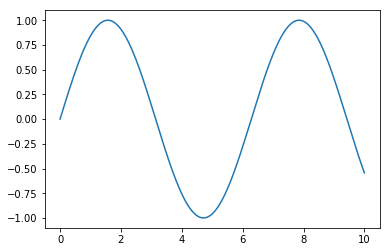

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# The data
class TimeSeriesData():
    
    def __init__(self,num_points,xmin,xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        
        # Grab a random starting point for each batch
        rand_start = np.random.rand(batch_size,1) 
        
        # Convert to be on time series
        ts_start = rand_start * (self.xmax- self.xmin - (steps*self.resolution) )
        
        # Create batch Time Series on t axis
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        # Create Y data for time series in the batches
        y_batch = np.sin(batch_ts)
        
        # Format for RNN
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) ,batch_ts
        
        else:
            
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 
ts_data = TimeSeriesData(250, 0, 10)
plt.plot(ts_data.x_data, ts_data.y_true)

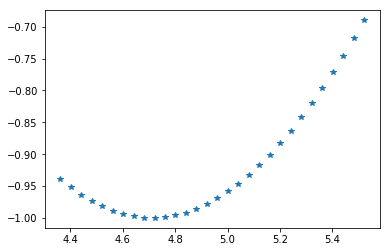

In [ ]:
# Num of steps in batch (also used for prediction steps into the future)
num_time_steps = 30
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

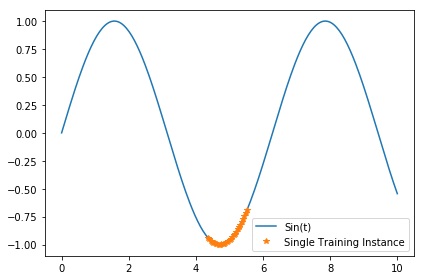

In [ ]:
plt.plot(ts_data.x_data,ts_data.y_true,label='Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(), '*', label='Single Training Instance')
plt.legend()
plt.tight_layout()

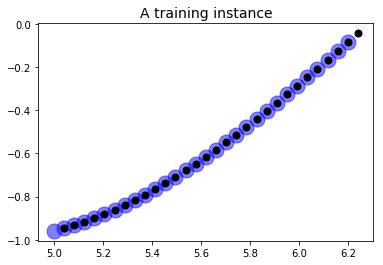

In [ ]:
# A Training instance and what to predict
# We are trying to predict a time series shifted over by t+1
train_inst = np.linspace(5, 5 + ts_data.resolution * (num_time_steps + 1), num_time_steps + 1)

plt.title("A training instance", fontsize=14)
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), 'bo', markersize=15,alpha=0.5, label='instance')
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), "ko", markersize=7, label="target")

In [ ]:
# Creating the Model
#tf.reset_default_graph()

# Constants
# just one feature, the time series
num_inputs = 1
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1
# learning rate, 0.0001 default, but you can play with this
learning_rate = 0.0001
# how manu iterations to go through (training steps), you can play with this
num_train_iterations = 2000
# Size of the batch of data
batch_size = 1

# Placeholders
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

# RNN Cell Layer
# you can play around with the values in this block
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)

# cell = tf.contrib.rnn.OutputProjectionWrapper(
#     tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
#     output_size=num_outputs)

# n_neurons = 100
# n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
#           for layer in range(n_layers)])

# cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu)

# n_neurons = 100
# n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
#           for layer in range(n_layers)])

# Dynamic RNN Cell
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# Loss Function and Optimizer
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdadeltaOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(loss)

# init variables
init = tf.global_variables_initializer()

# Session
# ONLY FOR GPU USERS:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.75)

saver = tf.train.Saver()

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = ts_data.next_batch(batch_size, num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./rnn_time_series_model")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
0 	MSE: 0.6154755
100 	MSE: 0.24896874
200 	MSE: 0.4

In [ ]:
# Predicting a time series t+1
with tf.Session() as sess:                          
    saver.restore(sess, "./rnn_time_series_model")   

    X_new = np.sin(np.array(train_inst[:-1].reshape(-1, num_time_steps, num_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./rnn_time_series_model


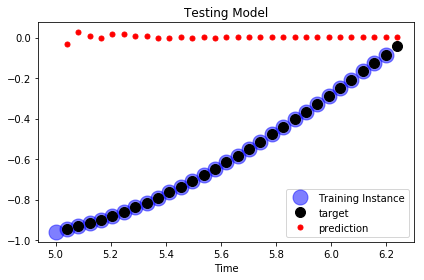

In [ ]:
plt.title("Testing Model")

# Training Instance
plt.plot(train_inst[:-1], np.sin(train_inst[:-1]), "bo", markersize=15,alpha=0.5, label="Training Instance")

# Target to Predict
plt.plot(train_inst[1:], np.sin(train_inst[1:]), "ko", markersize=10, label="target")

# Models Prediction
plt.plot(train_inst[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")

plt.xlabel("Time")
plt.legend()
plt.tight_layout()


In [ ]:
# Generating New Sequences
with tf.Session() as sess:
  saver.restore(sess, "./rnn_time_series_model")

  # SEED WITH ZEROS
  zero_seq_seed = [9. for i in range(num_time_steps)]
  for iteration in range(len(ts_data.x_data) - num_time_steps):
    X_batch = np.array(zero_seq_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
    y_pred = sess.run(outputs, feed_dict={X: X_batch})
    zero_seq_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./rnn_time_series_model


Text(0, 0.5, 'Value')

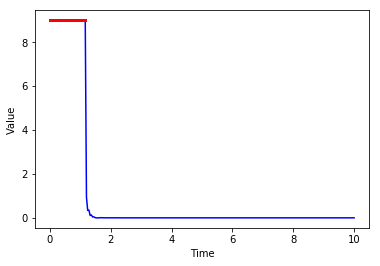

In [ ]:
plt.plot(ts_data.x_data, zero_seq_seed, "b-")
plt.plot(ts_data.x_data[:num_time_steps], zero_seq_seed[:num_time_steps], "r", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

In [ ]:
with tf.Session() as sess:
  saver.restore(sess, "./rnn_time_series_model")

  # SEED WITH Training Instance
  training_instance = list(ts_data.y_true[:30])
  for iteration in range(len(training_instance) -num_time_steps):
    X_batch = np.array(training_instance[-num_time_steps:]).reshape(1, num_time_steps, 1)
    y_pred = sess.run(outputs, feed_dict={X: X_batch})
    training_instance.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./rnn_time_series_model


Text(0.5, 0, 'Time')

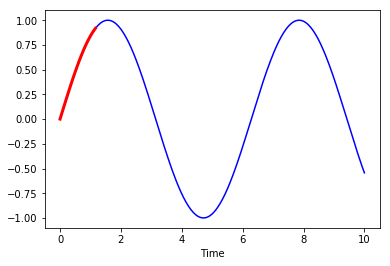

In [ ]:
plt.plot(ts_data.x_data, ts_data.y_true, "b-")
plt.plot(ts_data.x_data[:num_time_steps],training_instance[:num_time_steps], "r-", linewidth=3)
plt.xlabel("Time")

# Time Series Exercise

In [ ]:
# Monthly milk production: pounds per cow, jan 62 - Dec 75
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
milk = pd.read_csv('monthly-milk-production.csv', index_col='Month')
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


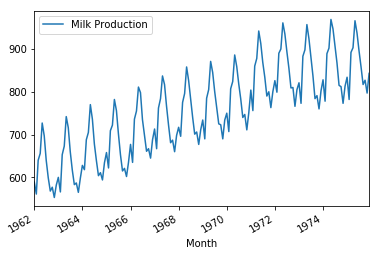

In [ ]:
# make the index a time series by using milk.index = pd.to_datatime(milk.index)
milk.index = pd.to_datetime(milk.index)

# plot out the time series data
milk.plot()

In [ ]:
# Train Test Split
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [ ]:
train_set = milk.head(156)
test_set = milk.tail(12)

In [ ]:
# Scale the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

# Word2vec

In [ ]:
# Step 0: Imports
import collections
import math
import os
import errno
import random
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange
import tensorflow as tf

In [ ]:
# Step 1: The data.
data_dir = "/content/Tensorflow-Bootcamp-master/04-Recurrent-Neural-Networks/word2vec_data/words"
data_url = "http://mattmahoney.net/dc/text8.zip"

In [ ]:
def fetch_words_data(url=data_url, words_data=data_dir):
    
    # Make the Dir if it does not exist
    os.makedirs(words_data, exist_ok=True)
    
    # Path to zip file 
    zip_path = os.path.join(words_data, "words.zip")
    
    # If the zip file isn't there, download it from the data url
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(url, zip_path)
        
    # Now that the zip file is there, get the data from it
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    
    # Return a list of all the words in the data source.
    return data.decode("ascii").split()

In [ ]:
# Use Defaults (this make take awhile!!)
words = fetch_words_data()

In [ ]:
# Total words
len(words)

17005207

In [ ]:
# Random slice of words
words[9000:9040]

['feelings',
 'and',
 'the',
 'auditory',
 'system',
 'of',
 'a',
 'person',
 'without',
 'autism',
 'often',
 'cannot',
 'sense',
 'the',
 'fluctuations',
 'what',
 'seems',
 'to',
 'non',
 'autistic',
 'people',
 'like',
 'a',
 'high',
 'pitched',
 'sing',
 'song',
 'or',
 'flat',
 'robot',
 'like',
 'voice',
 'is',
 'common',
 'in',
 'autistic',
 'children',
 'some',
 'autistic',
 'children']

In [ ]:
for w in words[9000:9040]:
  print(w, end=' ')

feelings and the auditory system of a person without autism often cannot sense the fluctuations what seems to non autistic people like a high pitched sing song or flat robot like voice is common in autistic children some autistic children 

In [ ]:
# Build Word Counts
from collections import Counter
mylist = ['one', 'one', 'two']
Counter(mylist)

Counter({'one': 2, 'two': 1})

In [ ]:
Counter(mylist).most_common(1)

[('one', 2)]

In [ ]:
# Create Word Data and Vocab
def create_counts(vocab_size=50000):

    # Begin adding vocab counts with Counter
    vocab = [] + Counter(words).most_common(vocab_size )
    
    # Turn into a numpy array
    vocab = np.array([word for word, _ in vocab])
    
    
    dictionary = {word: code for code, word in enumerate(vocab)}
    data = np.array([dictionary.get(word, 0) for word in words])
    return data,vocab

vocab_size = 50000
# This may take awhile
data, vocabulary = create_counts(vocab_size = vocab_size)
data[0]

5233

In [ ]:
(words[100], data[100])

('interpretations', 4186)

In [ ]:
vocabulary.shape

(50000,)

In [ ]:
vocabulary[np.random.randint(0,50000)]

'vf'

In [ ]:
# Function for Batches
# The following is Direct from the word2vec file from TensorFlow Docs
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape = (batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1 # [ skip_window target skip_window]
  buffer = collections.deque(maxlen=span)
  if data_index + span > len(data):
    data_index = 0
  buffer.extend(data[data_index: data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [skip_window]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = random.randint(0, span - 1)
      targets_to_avoid.append(target)
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[target]
  if data_index == len(data):
    buffer[:] = data[:span]
    data_index = span
  else:
    buffer.append(data[data_index])
    data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of the batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels

In [ ]:
data_index = 0
batch, labels = generate_batch(8, 2, 1)
batch

array([3080, 3080, 3080, 3080, 3080, 3080, 3080, 3080], dtype=int32)

In [ ]:
labels

array([[5233],
       [  11],
       [5233],
       [  11],
       [  11],
       [5233],
       [  11],
       [5233]], dtype=int32)

In [ ]:
# Constants
# Size of the batch
batch_size = 128
# Dimension of embedding vector
embedding_size = 150
# How many words to consider left and right (the bigger, the longer the longer the training)
skip_window = 1
# How many times to reuse an input to generate a label
num_skips = 2

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.

# Random set of words to evaluate similarity on.
valid_size = 16
# Only pick dev samples in the head of the distribution
valid_window = 100
valid_examples = np.random.choice(valid_window, valid_size, replace = False)
# Number of negative examples to sample
num_sampled = 64
# Model learning rate
learning_rate = 0.01
# How many words in vocab
vocabulary_size = 50000

In [ ]:
# TensorFlow Placeholders and Constants

In [ ]:
tf.reset_default_graph()

# Input data.
train_inputs = tf.placeholder(tf.int32, shape=[None])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

# Variables
# Look up embeddings for inputs
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

# NCE Loss
# Construct the variables for the NCE Loss
nce_weights = tf.Variable(tf.truncated_normal([vocabulary_size, embedding_size], stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# compute the average NCE Loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, train_labels,
                                     embed, num_sampled, vocabulary_size))

# Optimizer
# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = 1.0)
trainer = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sort(tf.reduce_sum(tf.square(embeddings), axis=1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b = True)
# Add variable initializer
init = tf.global_variables_initializer()

# Session
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.9)
# Usually needs to be quite large to get good results, training takes a long time!
num_steps = 200001
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
  sess.run(init)
  average_loss = 0
  for step in range(num_steps):
    batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
    feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

    # We perform one update step by evaluating the training op (including it
    # in the list of returned values for session.run()
    empty, loss_val = sess.run([trainer, loss], feed_dict=feed_dict)
    average_loss += loss_val
    if step % 1000 == 0:
      if step > 0:
        average_loss /= 1000
      # The average loss is an estimate of the loss over the last 1000
      print("Average loss at step ", step, ": ", average_loss)
      average_loss = 0

  final_embeddings = normalized_embeddings.eval()

Average loss at step  0 :  255.1538543701172
Average loss at step  1000 :  10664.855231063842
Average loss at step  2000 :  23172.13481626892
Average loss at step  3000 :  27189.053765052795
Average loss at step  4000 :  31707.607022460936
Average loss at step  5000 :  35305.944391804216
Average loss at step  6000 :  37343.41905065918
Average loss at step  7000 :  39910.21113264084
Average loss at step  8000 :  43871.53841052246
Average loss at step  9000 :  44640.89527176454
Average loss at step  10000 :  45719.90643082428
Average loss at step  11000 :  41533.67615616849
Average loss at step  12000 :  48985.74348373778
Average loss at step  13000 :  46413.351688396695
Average loss at step  14000 :  42691.053640480044
Average loss at step  15000 :  44851.505335983915
Average loss at step  16000 :  45927.968500595096
Average loss at step  17000 :  41601.068788932804
Average loss at step  18000 :  40793.861017608644
Average loss at step  19000 :  44849.16115411377
Average loss at step  2

In [ ]:
# TSNE T-distributed Stochastic Neighbor Embedding
# Dimensionality reduction to 2-D vectors (down from 150), This might take a while

# Visualizing the result
import matplotlib.pyplot as plt
%matplotlib inline

def plot_with_labels(low_dim_embs, labels):
  assert low_dim_embs.shape[0] >= len(labels), "More labels then embeddings"
  plt.figure(figsize = (18, 18)) # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')


In [ ]:
final_embeddings.shape
type(final_embeddings)

numpy.ndarray

In [ ]:
from  sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

plot_only = 2000
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
labels = [vocabulary[i] for i in range(plot_only)]
low_dim_embs.shape

(2000, 2)

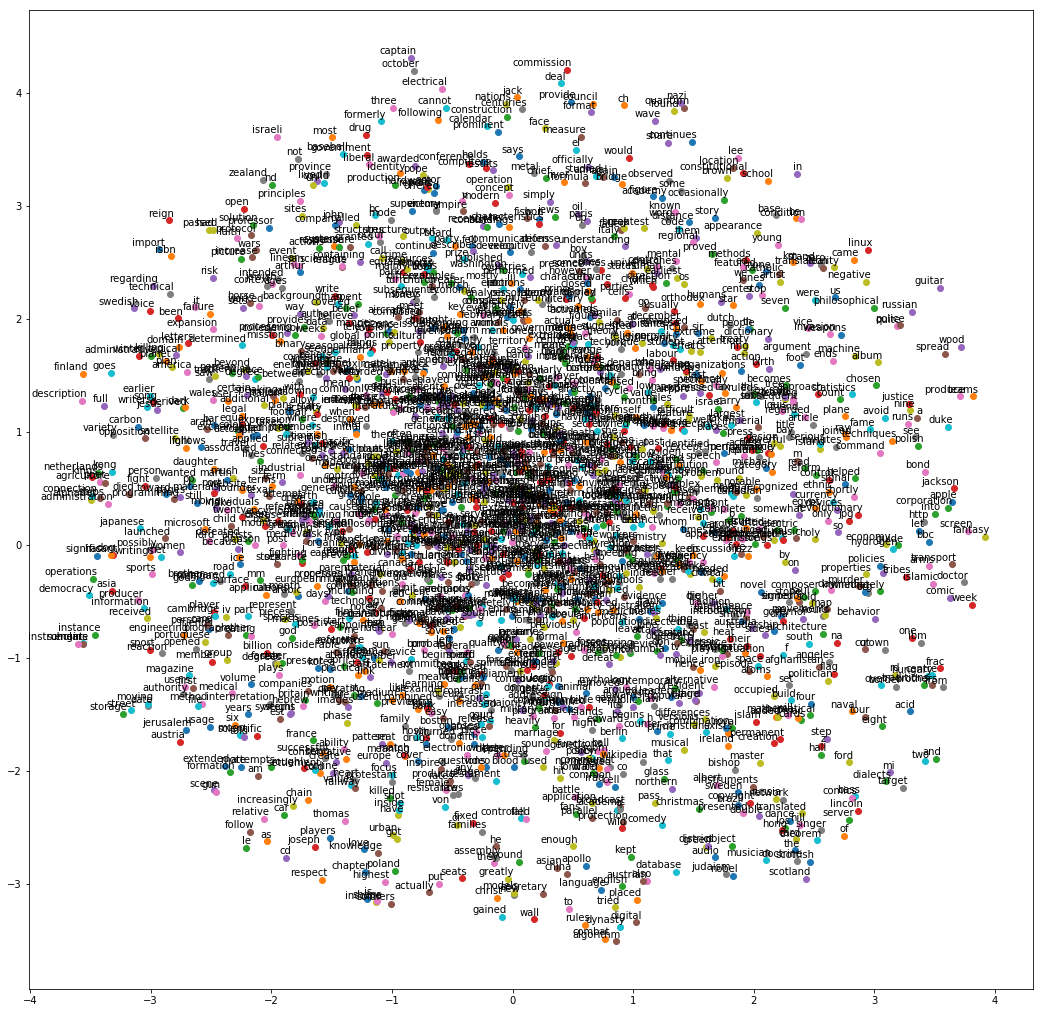

In [ ]:
plot_with_labels(low_dim_embs, labels)

(-19, 10)

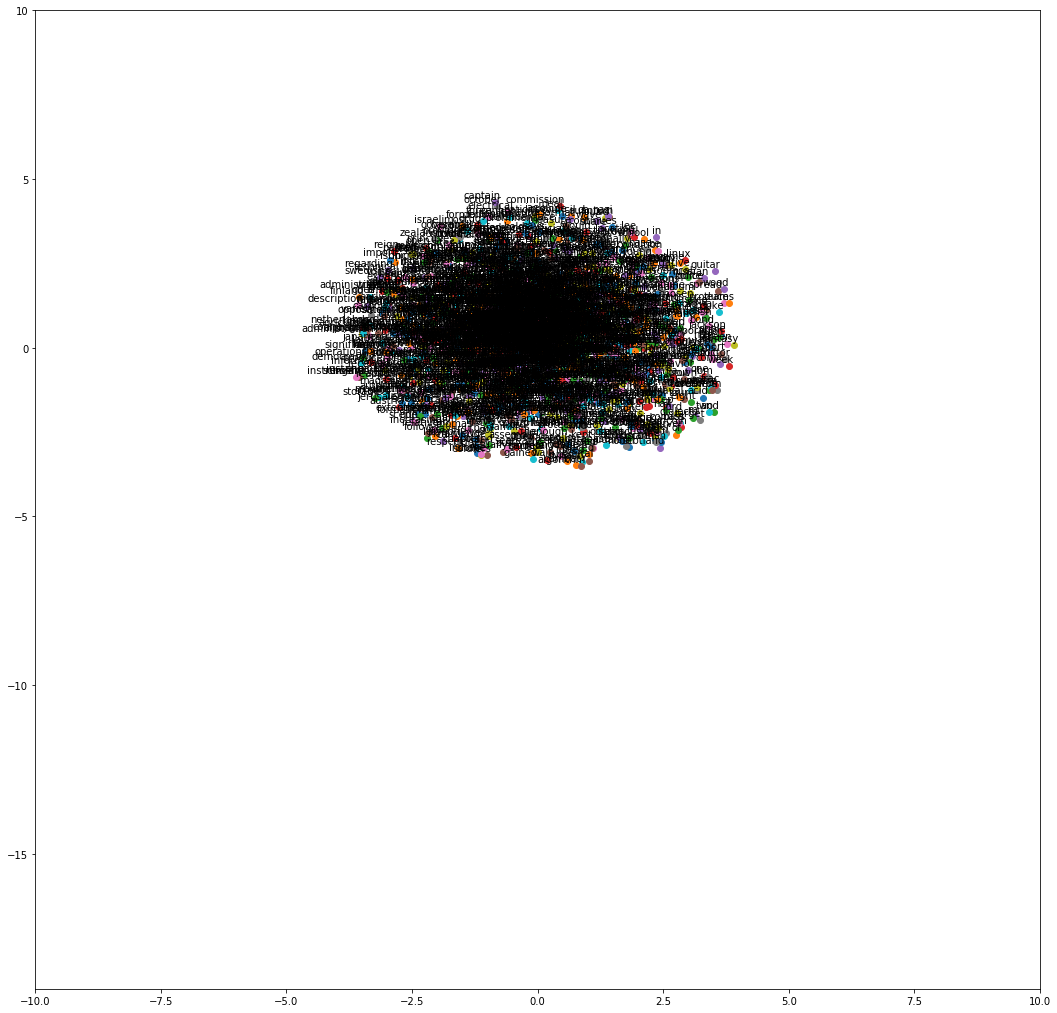

In [ ]:
plot_with_labels(low_dim_embs, labels)
plt.xlim(-10, 10)
plt.ylim(-19, 10)